In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players<-read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions<-read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
tidy_sessions<-sessions|>
mutate(session_duration = original_end_time - original_start_time)|>
filter(!is.na(hashedEmail), !is.na(session_duration))|>
group_by(hashedEmail)|>
summarize(num_session = n(), total_duration = sum(session_duration, na.rm = TRUE))
tidy_sessions

hashedEmail,num_session,total_duration
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,1e+07
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0e+00
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0e+00
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,3e+08
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,0e+00
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,1e+07


In [5]:
tidy_players<-players|>
select(hashedEmail, gender, Age)|>
filter(!is.na(gender))|>
semi_join(tidy_sessions, by = "hashedEmail")
tidy_players

hashedEmail,gender,Age
<chr>,<chr>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17
⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,Other,NA


In [6]:
player_session<-tidy_players|>
inner_join(tidy_sessions, by = "hashedEmail")
player_session

hashedEmail,gender,Age,num_session,total_duration
<chr>,<chr>,<dbl>,<int>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9,27,1.2e+08
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17,3,1.0e+07
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17,1,0.0e+00
⋮,⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17,1,0
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17,6,0
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,Other,NA,1,0


In [7]:
avg_player_session<-player_session|>
group_by(gender)|>
summarize(avg_session = mean(num_session), avg_total_duration = mean(total_duration))
avg_player_session

gender,avg_session,avg_total_duration
<chr>,<dbl>,<dbl>
Agender,10.00000,50000000
Female,15.91667,65833333
Male,12.21687,23855422
⋮,⋮,⋮
Other,1.000000,0
Prefer not to say,3.166667,1666667
Two-Spirited,1.000000,0


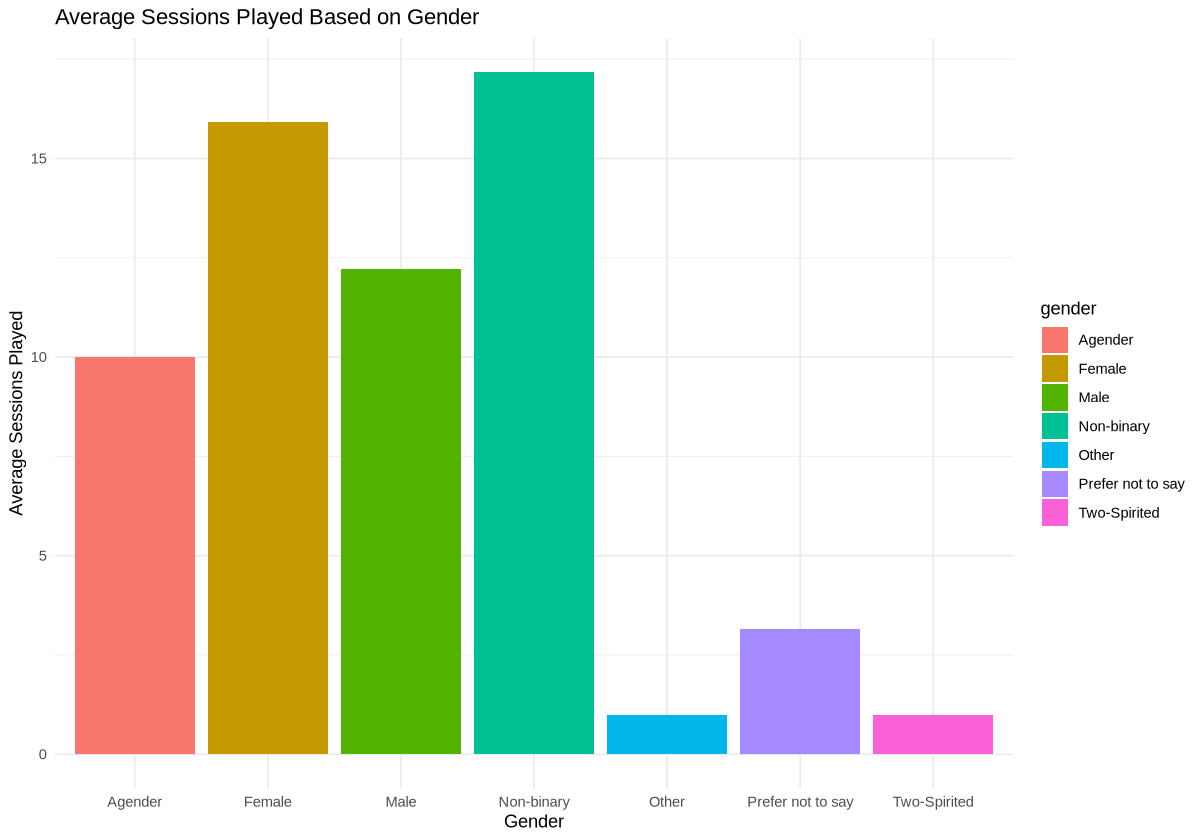

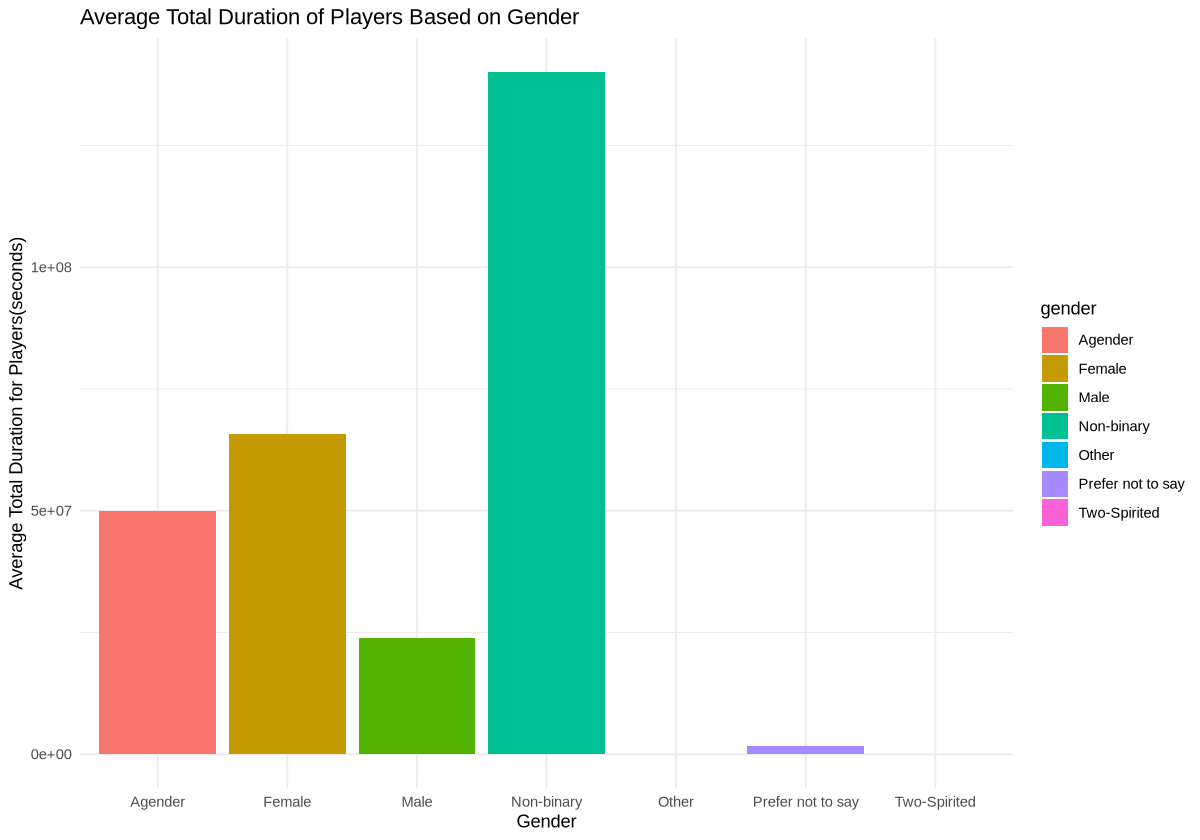

In [8]:
library(ggplot2)

options(repr.plot.width=10, repr.plot.height=7)
game_plot_1<-avg_player_session|>
ggplot(aes(x = gender, y = avg_session, fill = gender))+
geom_bar(stat = "identity")+
labs(title = "Average Sessions Played Based on Gender", x = "Gender", y = "Average Sessions Played")+
theme_minimal()

game_plot_2<-avg_player_session|>
ggplot(aes(x = gender, y = avg_total_duration, fill = gender))+
geom_bar(stat = "identity")+
labs(title = "Average Total Duration of Players Based on Gender", x = "Gender", y = "Average Total Duration for Players(seconds)")+
theme_minimal()

game_plot_1
game_plot_2